In [42]:
# Package Imports
import pandas as pd
import numpy as np

# 
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, make_scorer, recall_score, accuracy_score, precision_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB


from imblearn.pipeline import Pipeline as ImPipeline

# Modeling

In [17]:
max_features = 5000

In [8]:
# Read in the data
df = pd.read_csv('../data/train_cleaned.csv', usecols=['sentiment', 'text_cleaned', 'toks'])

In [16]:
df.head(25)

,sentiment,text_cleaned,toks
0,2,lovely pat one great voice generation listen c...,"['lovely', 'pat', 'one', 'great', 'voice', 'ge..."
1,2,despite fact play small portion game music hea...,"['despite', 'fact', 'play', 'small', 'portion'..."
2,1,bought charger jul work ok design nice conveni...,"['bought', 'charger', 'jul', 'work', 'ok', 'de..."
3,2,check maha energy's website powerex mh c f cha...,"['check', 'maha', ""energy's"", 'website', 'powe..."
4,2,review quite bit combo player hesitant due unf...,"['review', 'quite', 'bit', 'combo', 'player', ..."
5,1,also begin incorrect disc problem i've read vc...,"['also', 'begin', 'incorrect', 'disc', 'proble..."
6,1,love style couple year dvd give problem even w...,"['love', 'style', 'couple', 'year', 'dvd', 'gi..."
7,1,cannot scroll dvd menu set vertically triangle...,"['cannot', 'scroll', 'dvd', 'menu', 'set', 've..."
8,2,exotic tale orient dr shen fu weird tale magaz...,"['exotic', 'tale', 'orient', 'dr', 'shen', 'fu..."
9,1,firstly enjoy format tone book author address ...,"['firstly', 'enjoy', 'format', 'tone', 'book',..."


In [39]:
print(df.isna().sum())
df[df['text_cleaned'].isna()]

sentiment       0
text_cleaned    0
toks            0
dtype: int64


,sentiment,text_cleaned,toks


In [32]:
# Drop lone NaN value in 'text_cleaned'
df.drop(index=[369851], inplace=True)

In [33]:
X = df['text_cleaned']
y = df['sentiment']

In [34]:
# Instantiate Dummy Classifier pipeline
dummy_pipe = ImPipeline(steps=[
                                    ('vect', TfidfVectorizer(max_features=max_features)),
                                    ('dc', DummyClassifier(strategy='most_frequent',
                                                           random_state=42))
                                    ]
                            )

/Users/tom/opt/anaconda3/envs/spark-cap-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.500001250003125


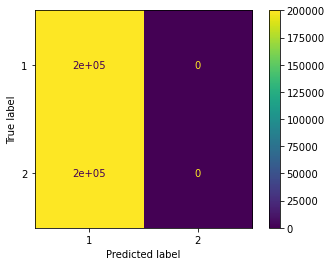

In [37]:
# Fit dummy pipe on the training data and plot confusion matrix
dummy_pipe.fit(X, y)
dummy_yhat = dummy_pipe.predict(X)
plot_confusion_matrix(dummy_pipe, X, y);
print(accuracy_score(y, dummy_yhat))